#🛠️ Preparación de los Datos

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('TelecomX_dataset_limpio.csv')
data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Borramos columnas no relevantes dado a que no tuvieron repercusión en el análisis anterior

In [ ]:
data = data.drop(['gender', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies'], axis=1)


data.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0,No,Yes,Yes,9,DSL,No,Yes,No,Yes,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0,No,No,No,9,DSL,No,No,No,No,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1,No,No,No,4,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1,Yes,Yes,No,13,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1,Yes,Yes,No,3,Fiber optic,No,No,No,Yes,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Eliminamos el 'No internet Service y lo pasamos simplemente a NO'

In [ ]:
cols = ['DeviceProtection', 'TechSupport', 'OnlineBackup', 'OnlineSecurity']

for col in cols:
    data[col] = data[col].str.replace('No internet service', 'No')

for col in data.columns:
    print(f"\n{col}:")
    print(data[col].unique())


Churn:
[0 1]

SeniorCitizen:
['No' 'Yes']

Partner:
['Yes' 'No']

Dependents:
['Yes' 'No']

tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]

InternetService:
['DSL' 'Fiber optic' 'No']

OnlineSecurity:
['No' 'Yes']

OnlineBackup:
['Yes' 'No']

DeviceProtection:
['No' 'Yes']

TechSupport:
['Yes' 'No']

Contract:
['One year' 'Month-to-month' 'Two year']

PaperlessBilling:
['Yes' 'No']

PaymentMethod:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Charges.Monthly:
[65.6  59.9  73.9  ... 91.75 68.8  67.85]

Charges.Total:
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]

Charges.Daily:
[2.18666667 1.99666667 2.46333333 ... 3.05833333 2.29333333 2.26166667]


Convertimos las variables los Si y NO a 1 y 0

In [ ]:
diccionario = {'No':0, 'Yes':1}
cols_bin = ['SeniorCitizen','Dependents','Partner','DeviceProtection', 'TechSupport', 'OnlineBackup', 'OnlineSecurity','PaperlessBilling']
for col in cols_bin:
    data[col] = data[col].map(diccionario)

for col in data.columns:
    print(f"\n{col}:")
    print(data[col].unique())


Churn:
[0 1]

SeniorCitizen:
[0 1]

Partner:
[1 0]

Dependents:
[1 0]

tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]

InternetService:
['DSL' 'Fiber optic' 'No']

OnlineSecurity:
[0 1]

OnlineBackup:
[1 0]

DeviceProtection:
[0 1]

TechSupport:
[1 0]

Contract:
['One year' 'Month-to-month' 'Two year']

PaperlessBilling:
[1 0]

PaymentMethod:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Charges.Monthly:
[65.6  59.9  73.9  ... 91.75 68.8  67.85]

Charges.Total:
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]

Charges.Daily:
[2.18666667 1.99666667 2.46333333 ... 3.05833333 2.29333333 2.26166667]


Se realiza el One-hot encoding (sin dummy trap)

In [ ]:
cat_cols = [
       'Churn', 'Partner', 'Dependents',
        'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

df_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
df_encoded

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Daily,Churn_1,Partner_1,Dependents_1,InternetService_Fiber optic,InternetService_No,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.60,593.30,2.186667,False,True,True,False,False,False,True,False,True,True,False,True,False,False,True
1,0,9,59.90,542.40,1.996667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0,4,73.90,280.85,2.463333,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,3.266667,True,True,False,True,False,False,True,True,False,False,False,True,False,True,False
4,1,3,83.90,267.40,2.796667,True,True,False,True,False,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,0,13,55.15,742.90,1.838333,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True
7006,0,22,85.10,1873.70,2.836667,True,True,False,True,False,False,False,False,False,False,False,True,False,True,False
7007,0,2,50.30,92.75,1.676667,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
7008,0,67,67.85,4627.65,2.261667,False,True,True,False,False,True,False,True,True,False,True,False,False,False,True


Se procede a normalizar los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Escogemos las variables numericas
cols_nums =['tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily']

scaler = MinMaxScaler()

# Se aplica la normalización
df_encoded[cols_nums] = scaler.fit_transform(df_encoded[cols_nums])

# Mostrando los datos normalizados
df_encoded.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Daily,Churn_1,Partner_1,Dependents_1,InternetService_Fiber optic,InternetService_No,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.112676,0.471144,0.066294,0.471144,False,True,True,False,False,False,True,False,True,True,False,True,False,False,True
1,0,0.112676,0.414428,0.060420,0.414428,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0,0.042254,0.553731,0.030239,0.553731,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
3,1,0.169014,0.793532,0.140670,0.793532,True,True,False,True,False,False,True,True,False,False,False,True,False,True,False
4,1,0.028169,0.653234,0.028687,0.653234,True,True,False,True,False,False,False,False,True,False,False,True,False,False,True


#🎯 Correlación y Selección de Variables

Se procede a hacer la matriz de correlación

In [ ]:
correlacion = df_encoded.corr()


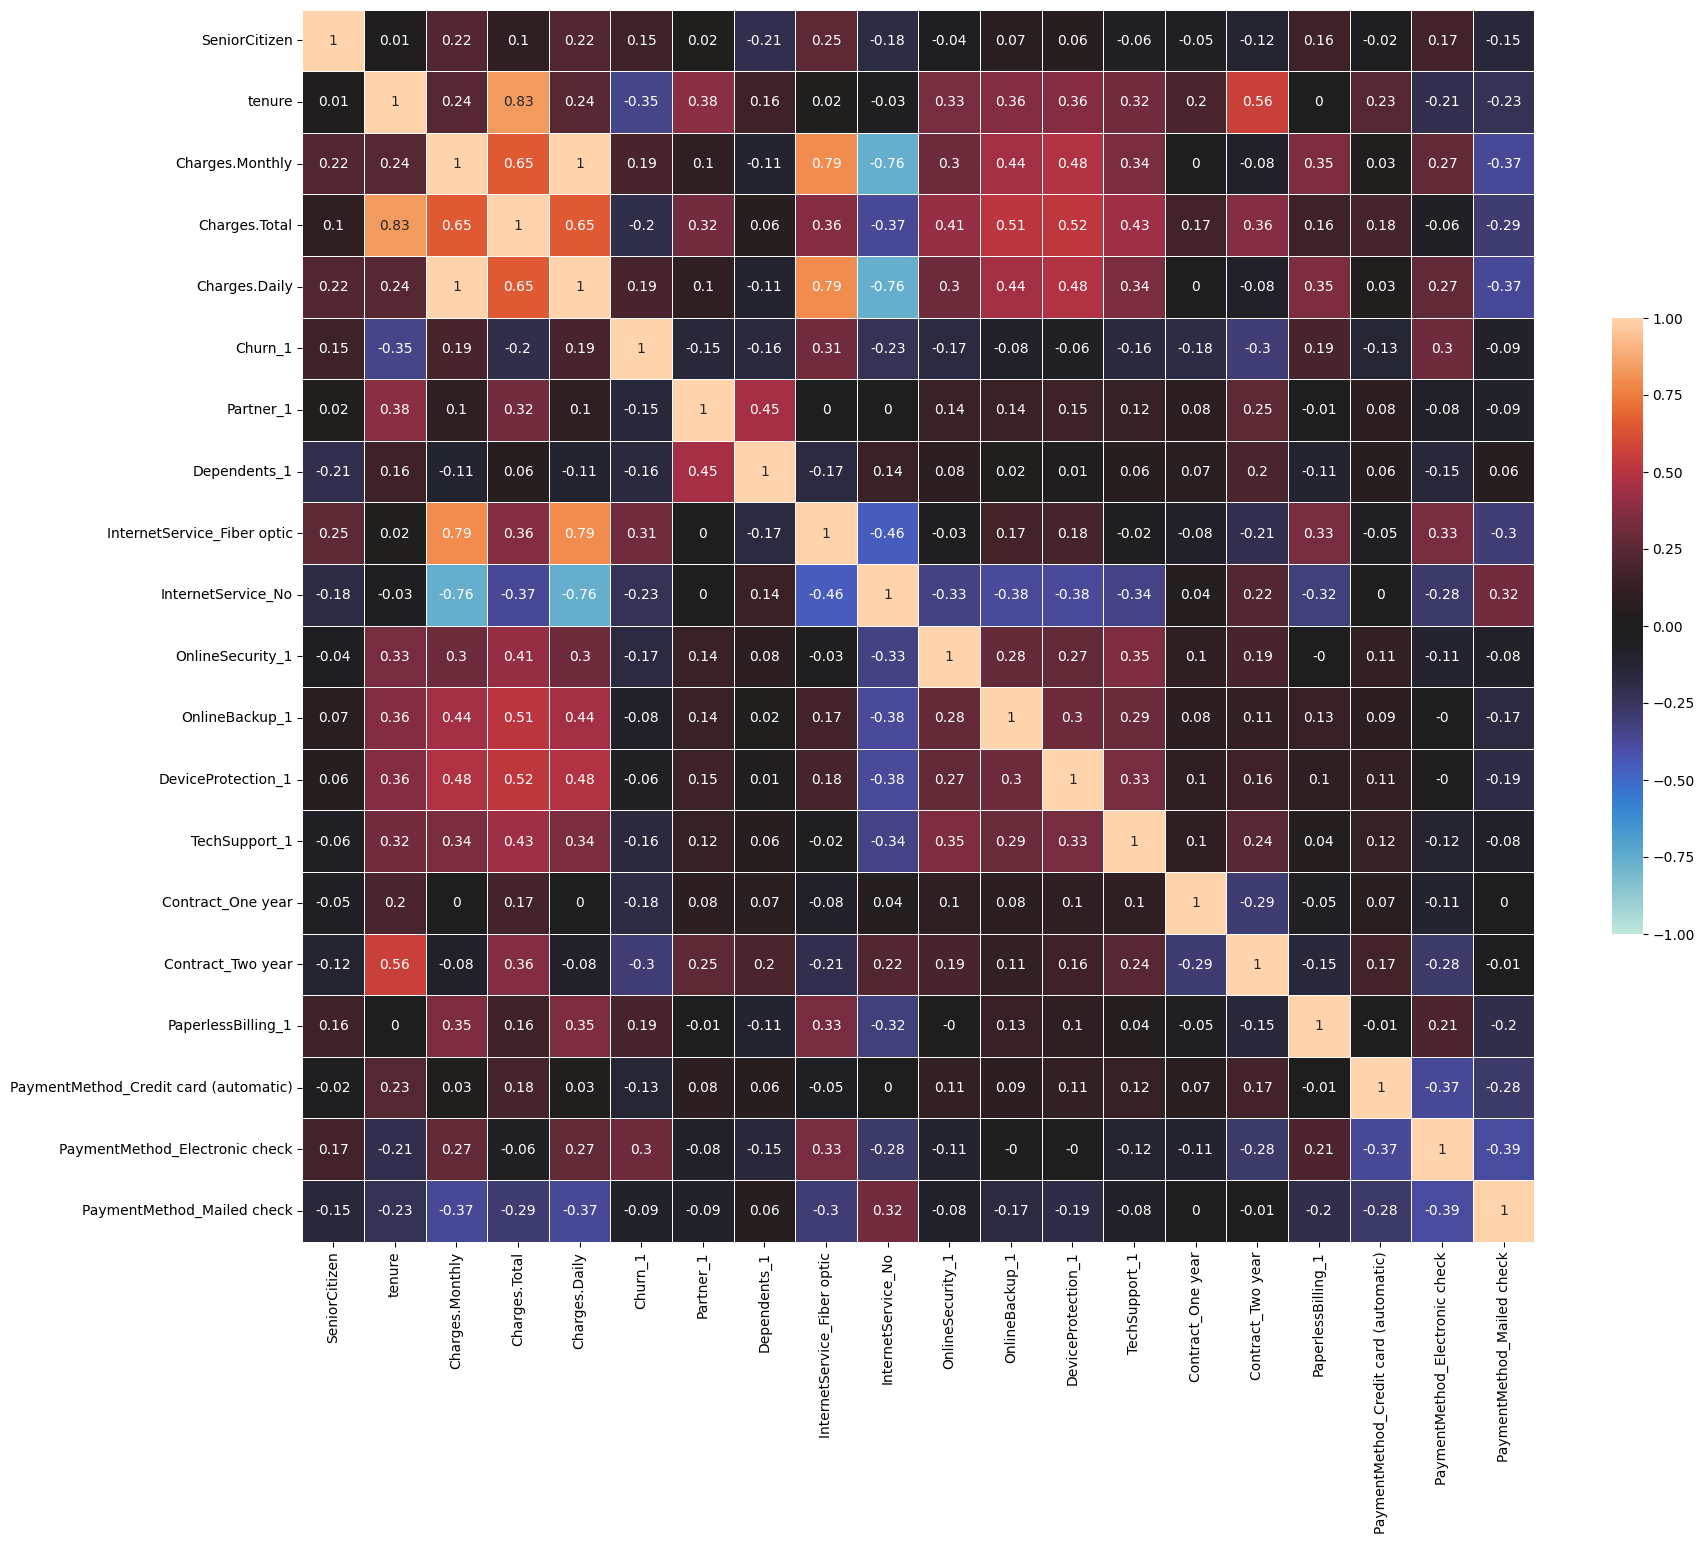

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(correlacion, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

Ahora se hace en base al umbral, donde tomaremos valores entre valores de 0.2 y 0.5, para observar la correlación con respecto a la variable objetivo, que es la evasión


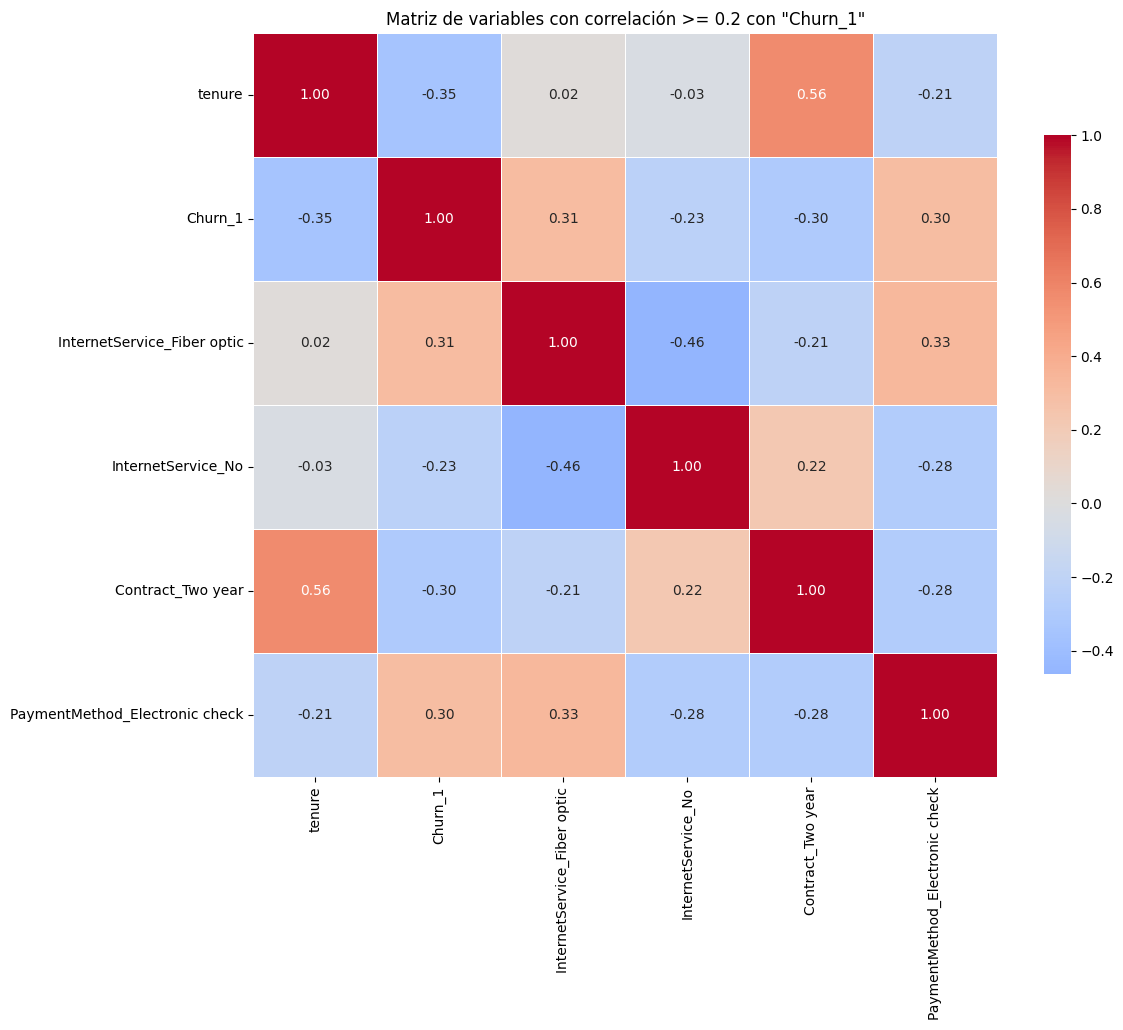

In [ ]:
#Analizando con la variable objetivo correspondiente a la evasión
Evasion = 'Churn_1'

#Definimos el umbral, empezando con 0.2
umbral = 0.2

#Variables relacionadas a la evasión
variablesinfluyentes= correlacion.index[abs(correlacion[Evasion]) >= umbral].tolist()

#se crea la matriz de correlación con las variables influyentes

corr_filtrada = correlacion.loc[variablesinfluyentes, variablesinfluyentes]

#se hace el heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
)
plt.title(f'Matriz de variables con correlación >= {umbral} con "{Evasion}"')
plt.show()

En este podemos ver 5 variables influyentes a la hora de la evasión

Luego se realiza con un umbral de 0.3


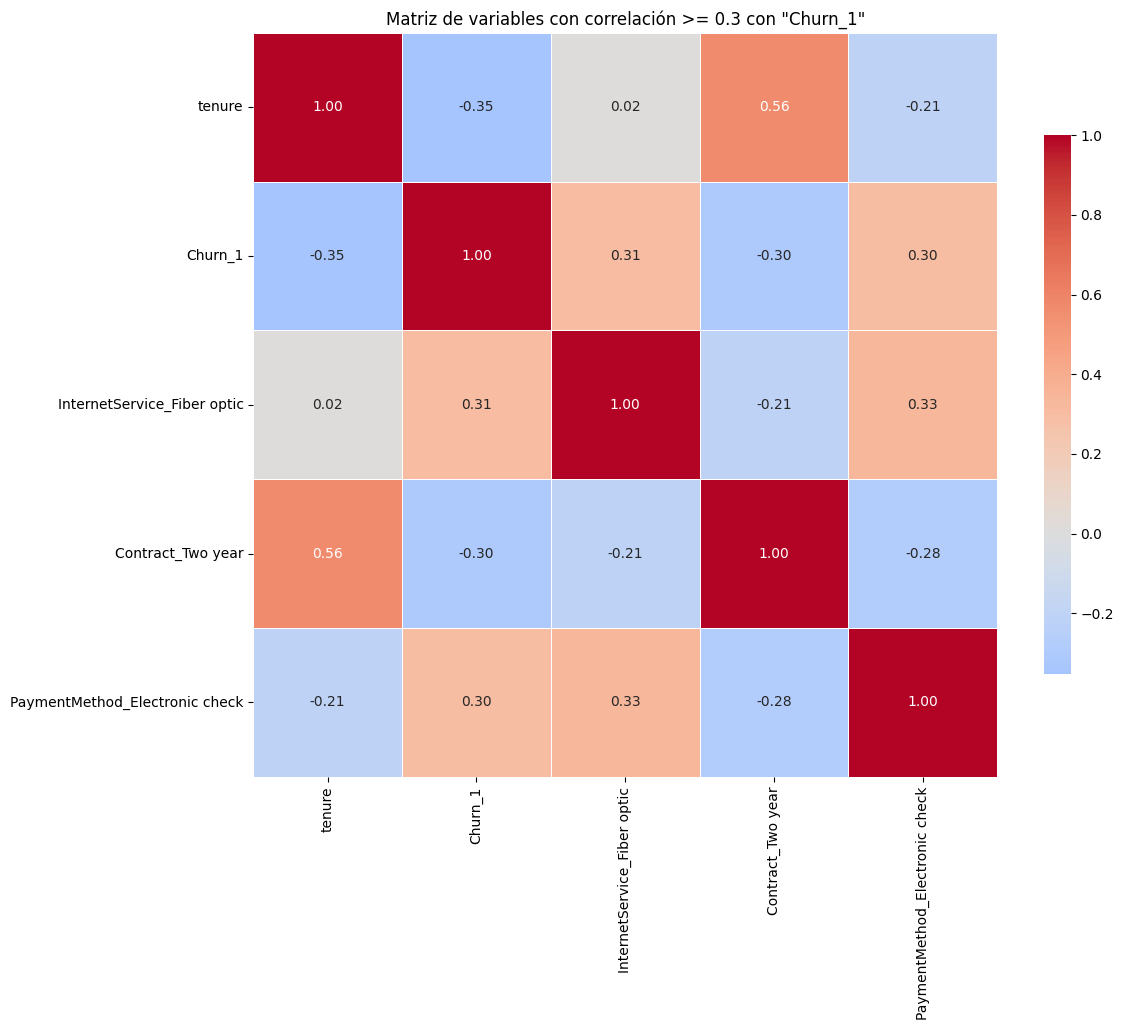

In [ ]:
#Analizando con la variable objetivo correspondiente a la evasión
Evasion = 'Churn_1'

#Definimos el umbral, empezando con 0.2
umbral = 0.3

#Variables relacionadas a la evasión
variablesinfluyentes= correlacion.index[abs(correlacion[Evasion]) >= umbral].tolist()

#se crea la matriz de correlación con las variables influyentes

corr_filtrada = correlacion.loc[variablesinfluyentes, variablesinfluyentes]

#se hace el heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
)
plt.title(f'Matriz de variables con correlación >= {umbral} con "{Evasion}"')
plt.show()

En este el internet_service no posee relevancia. cuando se usa un umbral de 0.3

Ahora lo realizamos con un umbral de 0.35


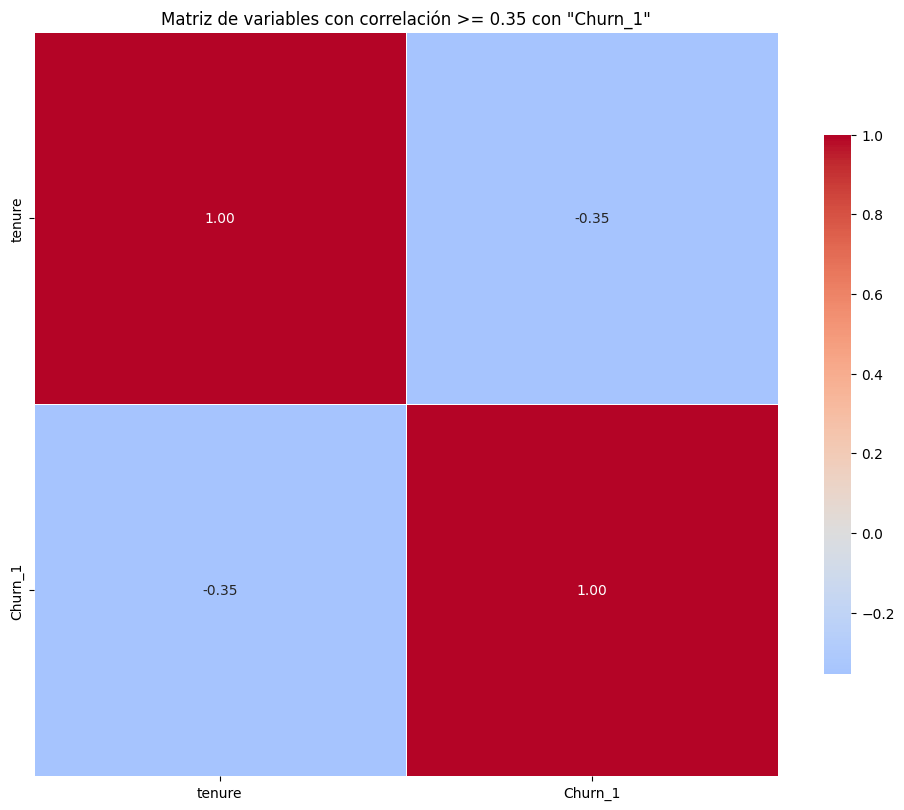

In [ ]:
#Analizando con la variable objetivo correspondiente a la evasión
Evasion = 'Churn_1'

#Definimos el umbral, empezando con 0.2
umbral = 0.35

#Variables relacionadas a la evasión
variablesinfluyentes= correlacion.index[abs(correlacion[Evasion]) >= umbral].tolist()

#se crea la matriz de correlación con las variables influyentes

corr_filtrada = correlacion.loc[variablesinfluyentes, variablesinfluyentes]

#se hace el heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
)
plt.title(f'Matriz de variables con correlación >= {umbral} con "{Evasion}"')
plt.show()

Aqui, solamente tiene influencia el tenure, representado como la duración de los contratos tiene relación con un umbral 0.35





**Observaciones:**

ternure presenta = -0.35, es decir, que a menos duración del contrato, son más propensos a la evasión.

fiber_optic = 0.31, es decir, los que tienen este servicio, tienen posibilidad de evasión.

Interner_Service_No = -0.23, los que no poseen servicio de internet, tienden a quedarse con el servicio.

Contract_two_years = -0.3, entre mas duracion el contrato, se tiende a fidelizar el cliente previniendo la evasion, caso contrario si dura menos el contrato.

PaymentMethod_Electronic_Check = 0.3, los que escogen este metodo de pago, tienden a la evasion.

#🤖 Modelado Predictivo

Para empezar, importamos las librerias a usar

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Separamos la variable de la evasión, dado a que esa es la de analizar con el resto de variables, por lo tanto:


In [ ]:
X = df_encoded.drop(columns=['Churn_1'])
y = df_encoded['Churn_1']

Teniendo esto, dividimos los datos de entrenamienton y los datos para el testeo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Balanceamos el entrenamiento, por si la variable churn_1 presenta algun desbalance

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

#Usamos el **modelo random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7622444127436995
ROC AUC: 0.8135583575846396
Matriz de Confusión:
 [[1242  304]
 [ 196  361]]
              precision    recall  f1-score   support

       False       0.86      0.80      0.83      1546
        True       0.54      0.65      0.59       557

    accuracy                           0.76      2103
   macro avg       0.70      0.73      0.71      2103
weighted avg       0.78      0.76      0.77      2103



**Observación:**

Con el modelo de random forest, tenemos una exactitud en la predicción del 76,2%.

#Realizamos un **modelo KNN**, necesita de normalizacion, los datos ya se normalizaron anteriormente, por lo que no tendremos ningún problema al entrenar.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes cambiar k
knn.fit(X_train_bal, y_train_bal)

# Predicción
y_pred_kn = knn.predict(X_test)
y_prob_kn = knn.predict_proba(X_test)[:, 1]

# Evaluación
print("KNN")
print("Exactitud:", accuracy_score(y_test, y_pred_kn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_kn))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_kn))
print(classification_report(y_test, y_pred_kn))

KNN
Exactitud: 0.7113647170708511
ROC AUC: 0.7566622383355668
Matriz de Confusión:
 [[1117  429]
 [ 178  379]]
              precision    recall  f1-score   support

       False       0.86      0.72      0.79      1546
        True       0.47      0.68      0.56       557

    accuracy                           0.71      2103
   macro avg       0.67      0.70      0.67      2103
weighted avg       0.76      0.71      0.73      2103



**Observación:**

Este posee un acuraccy de 71%, pero se probaran diferentes valores de n_neighbours para testear el resultado de este.

In [ ]:
for k in [1, 3, 4, 7, 9, 11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_bal, y_train_bal)

    # Predicción
    y_pred_kn = knn.predict(X_test)
    y_prob_kn = knn.predict_proba(X_test)[:, 1]

    # Evaluación
    print(f'KNN con n_neighbors = {k}')
    print("Exactitud:", accuracy_score(y_test, y_pred_kn))
    print("ROC AUC:", roc_auc_score(y_test, y_prob_kn))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_kn))
    print(classification_report(y_test, y_pred_kn))

KNN con n_neighbors = 1
Exactitud: 0.7023300047551118
ROC AUC: 0.6522565908198839
Matriz de Confusión:
 [[1173  373]
 [ 253  304]]
              precision    recall  f1-score   support

       False       0.82      0.76      0.79      1546
        True       0.45      0.55      0.49       557

    accuracy                           0.70      2103
   macro avg       0.64      0.65      0.64      2103
weighted avg       0.72      0.70      0.71      2103

KNN con n_neighbors = 3
Exactitud: 0.7047075606276747
ROC AUC: 0.7300278009387752
Matriz de Confusión:
 [[1115  431]
 [ 190  367]]
              precision    recall  f1-score   support

       False       0.85      0.72      0.78      1546
        True       0.46      0.66      0.54       557

    accuracy                           0.70      2103
   macro avg       0.66      0.69      0.66      2103
weighted avg       0.75      0.70      0.72      2103

KNN con n_neighbors = 4
Exactitud: 0.7337137422729434
ROC AUC: 0.746733912267948
Mat

**Observación:**

La máxima precisión es de 73,3% con un n_neighbors igual a 4, inferior a esto se presenta un overfitting, por lo que reduce su presición, dado a que el modelo se ajusta demasiado, generando ruido, así mismo superior a este se presenta un underfitting, ignorando patrones locales de los datos, reduciendo su precisión.

#Modelo **Árbol de Decisión**

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_bal, y_train_bal)

# Predicción

y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Evaluación

print('Arbol de decisión')
print("Exactitud:", accuracy_score(y_test, y_pred_tree))
print("ROC AUC:", roc_auc_score(y_test, y_prob_tree))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Arbol de decisión
Exactitud: 0.7013789824060865
ROC AUC: 0.6554866790071558
Matriz de Confusión:
 [[1164  382]
 [ 246  311]]
              precision    recall  f1-score   support

       False       0.83      0.75      0.79      1546
        True       0.45      0.56      0.50       557

    accuracy                           0.70      2103
   macro avg       0.64      0.66      0.64      2103
weighted avg       0.73      0.70      0.71      2103



**Observación:**

Con un módelo arbol de decisión, se tiene una precisión del 70%

#*Informe final*

**Introducción**

En base a los datos y el análisis exploratorio relacionado al Challenge anterior, dónde se encontraron las variables que afectan la evasión en los clientes de telecom x, se procede a realizar modelos predictivos, en base a la evasión, dónde se van a analizar las métricas de cada modelo, compararlos y observar cuál es el mejor.

**Desarrollo**

De primera instancia eliminamos las columnas que no son relevantes para la evaluación del churn/evasion, dado a que dieron resultados pobres en el análisis exploratorio, estos datos son 'gender', 'PhoneService', 'MultipleLines'  'StreamingTV', 'StreamingMovies'.

Posteriormente a este transformamos los datos en variables numéricas con el fin de facilitar el análisis, para luego realizar un encoding para un manejo sencillo de estos.

Luego se normalizan los datos que son variables numéricas, para que puedan ir en un rango entre 0 y 1, esto es necesario para algunos modelos para que puedan trabajar de manera correcta sin ningún problema.

Luego de esto, hacemos una gráfica de correlación de los datos, el cual se obtuvo la siguiente gráfica:

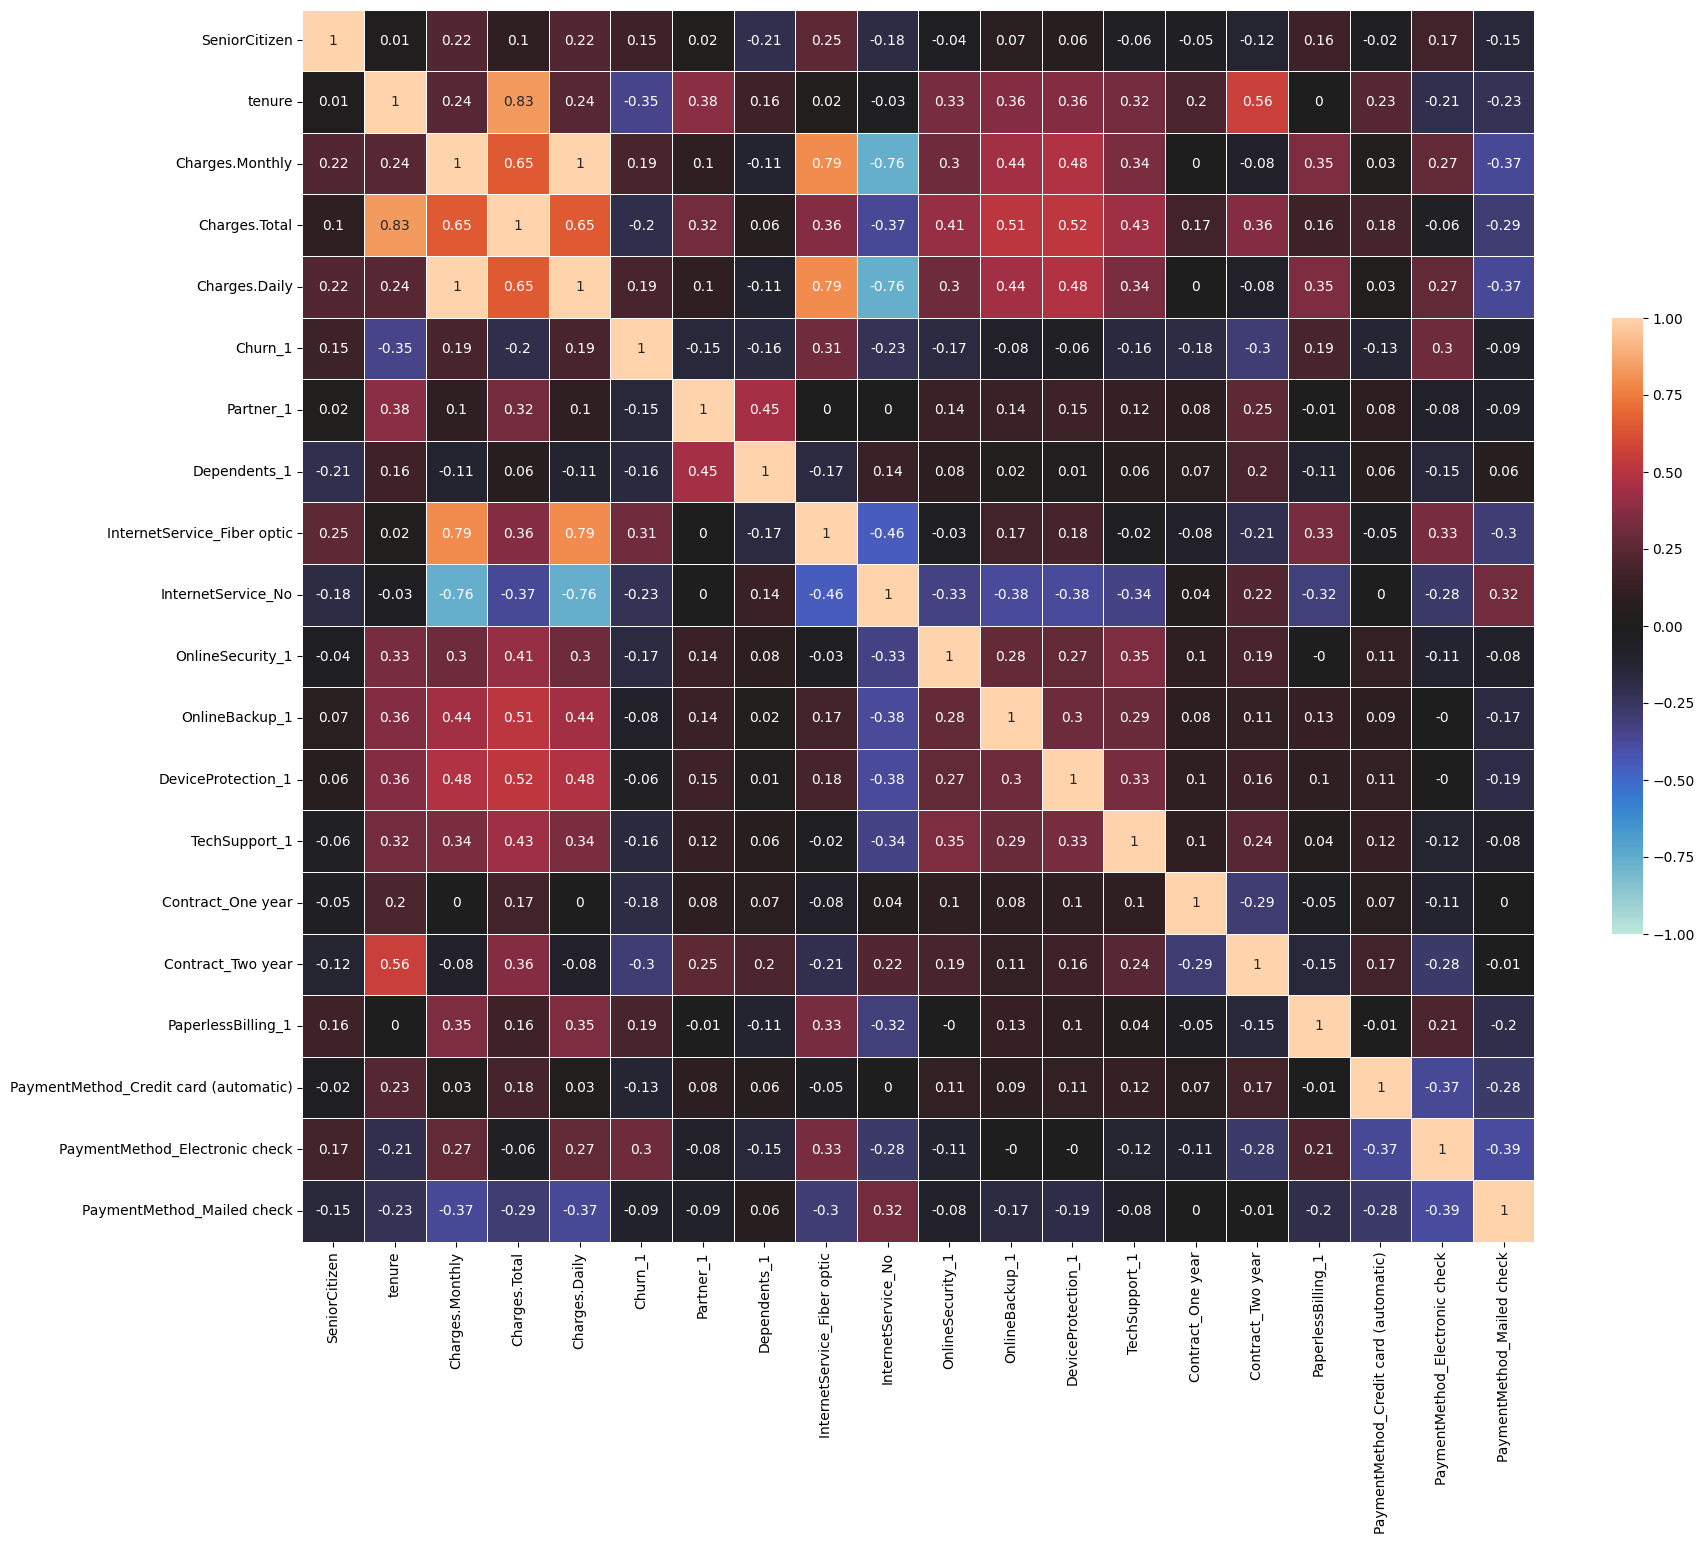

Está gráfica no muestra cómo está relacionado cada variable de los datos con las demás.

Cómo nuestra variable de interés el el churn/evasion, se realiza una gráfica de correlación en base a este, dónde se seleccionó un umbral de 0.2, 0.3 y 0.35, de esta manera, podemos ver las variables que están fuertemente relacionadas a la evasión de la empresa telecom X, el resultado fue el siguiente:

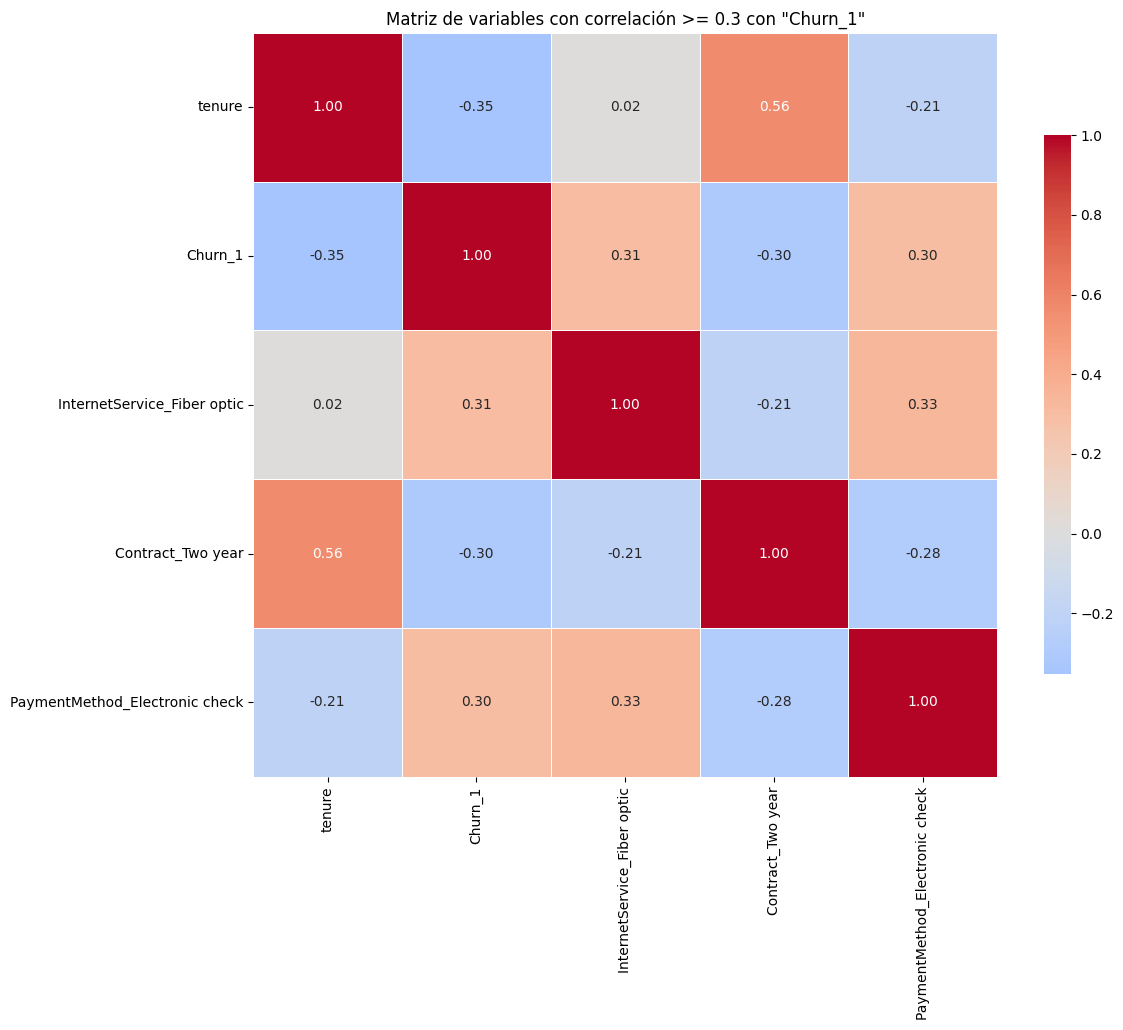

De la gráfica podemos observar las siguientes variables que tienen una repercusión fuerte en la evasión, que son:

1. ternure presenta = -0.35, es decir, que a menos duración del contrato, son más propensos a la evasión.

2. fiber_optic = 0.31, es decir, los que tienen este servicio, tienen posibilidad de evasión.

3. Interner_Service_No = -0.23, los que no poseen servicio de internet, tienden a quedarse con el servicio.

4. Contract_two_years = -0.3, entre mas duracion el contrato, se tiende a fidelizar el cliente previniendo la evasion, caso contrario si dura menos el contrato.

5. PaymentMethod_Electronic_Check = 0.3, los que escogen este metodo de pago, tienden a la evasion.

Sabiendo los factores influyentes, se realizan los modelos predictivos, en el cual se escogieron random forest, KNN y árbol de decisión.

**Random Forest**

Al momento de usar este modelo, los resultados obtenidos fueron los siguientes:

Exactitud: 0.7622444127436995

ROC AUC: 0.8135583575846396

Matriz de Confusión:

 [[1242  304]

 [ 196  361]]

              precision    recall  f1-score   support

       False       0.86      0.80      0.83      1546
        True       0.54      0.65      0.59      557

Este presenta AUC elevado y buen balance accuracy/recall sin señales de over/underfitting evidentes.

Este modelo se puede mejorar si se configura los hiper-parámetros (max_depth, min_samples_leaf, n_estimators).

**KNN**

Para este modelo, se usaron diferentes modelos de n_neighbour para su entrenamiento, el mejor resultado obtenido por parte de este modelo se encuentra en el siguiente:

Exactitud: 0.7337137422729434

ROC AUC: 0.746733912267948

Matriz de Confusión:

 [[1227  319]

 [ 241  316]]

              precision    recall  f1-score   support

       False       0.84      0.79      0.81      1546
        True       0.50      0.57      0.53      557

Este presenta un Recall y F1 bajos (0,57 y 0,53), por lo que tiene ligero underfitting para la clase True.

**Árbol de decisión**

Los resultados obtenidos de este modelo, son los siguientes:

Exactitud: 0.7013789824060865

ROC AUC: 0.6554866790071558

Matriz de Confusión:

 [[1164  382]

 [ 246  311]]

              precision    recall  f1-score   support

       False       0.83      0.75      0.79      1546
        True       0.45      0.56      0.5       557

Estos presentan peores valores en todas las métricas, por lo que puede tener underfitting, también es un modelo simple, puede mejorar si se cambian ciertos parametros del modelo.

**Conclusión**

**¿Cuál modelo tuvo el mejor desempeño?**
- Random Forest domina en accuracy, recall, F1 y ROC-AUC, sin que ninguna métrica lo supere en otro modelo, por ende es el mejor modelo presentado.
- A pesar de que la precisión para la clase minoritaria (True) sigue siendo modesta (0,54), la combinación de todas las métricas lo sitúa claramente como el ganador.


